Sentiment distribution:
 sentiment
Neutral     106
Positive     94
Name: count, dtype: int64

Sample sentiment results:
  channel_info                               caption  polarity sentiment
0    cristiano  Can't believe we hit 1M followers 🎉🙏  0.000000   Neutral
1  kyliejenner                Loving this new look!   0.385227  Positive
2     leomessi      Feeling blessed and grateful. ❤️  0.000000   Neutral
3  selenagomez             What a beautiful sunset 🌅  0.850000  Positive
4      therock             What a beautiful sunset 🌅  0.850000  Positive


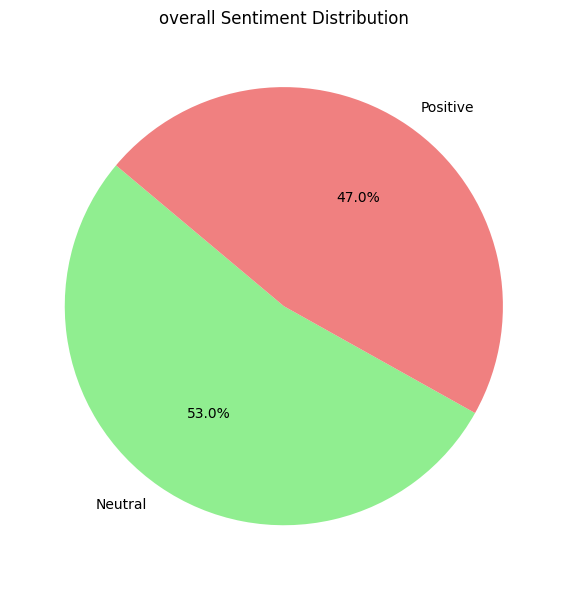


Top Positive Influencers:
      channel_info                    caption  polarity
3      selenagomez  What a beautiful sunset 🌅      0.85
4          therock  What a beautiful sunset 🌅      0.85
60  camila_cabello  What a beautiful sunset 🌅      0.85
33         dualipa  What a beautiful sunset 🌅      0.85
23       iamcardib  What a beautiful sunset 🌅      0.85

Top Negative Influencers:
    channel_info                                  caption  polarity
0      cristiano     Can't believe we hit 1M followers 🎉🙏       0.0
2       leomessi         Feeling blessed and grateful. ❤️       0.0
6   arianagrande     Can't believe we hit 1M followers 🎉🙏       0.0
5  kimkardashian            Another day, another grind. 💪       0.0
7        beyonce  Travel makes you richer in memories ✈️🌍       0.0


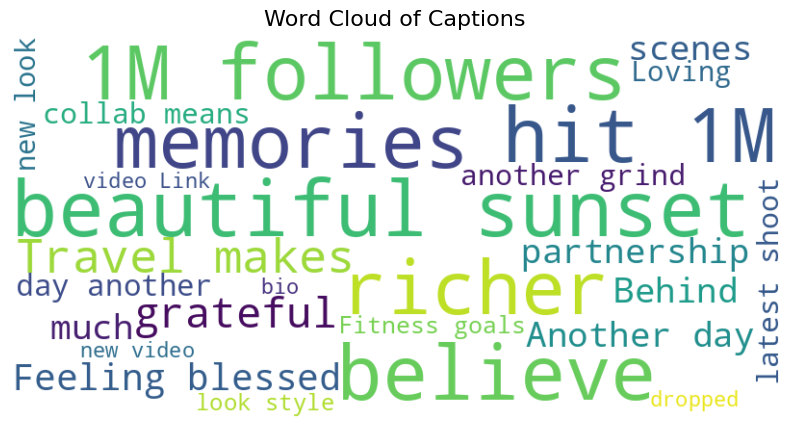

In [2]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load dataset
df = pd.read_csv("/content/insta_influencers_with_captions.csv")

# Sentiment Analysis using TextBlob
df['polarity'] = df['caption'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['caption'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Categorize Sentiment
def classify_sentiment(polarity):
  if polarity > 0:
    return 'Positive'
  elif polarity < 0:
    return 'Negative'
  else:
    return 'Neutral'

df['sentiment'] = df['polarity'].apply(classify_sentiment)

# Sentiment distribution
print("Sentiment distribution:\n", df['sentiment'].value_counts())
print("\nSample sentiment results:")
print(df[['channel_info', 'caption', 'polarity', 'sentiment']].head())

# Pie chart of sentiment categories
plt.figure(figsize=(6,6))
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral', 'lightgray'])
plt.title("overall Sentiment Distribution")
plt.ylabel('')
plt.tight_layout()
plt.show()

# Top Positive Influencers
top_positive = df.sort_values(by='polarity', ascending=False).head(5)
print("\nTop Positive Influencers:")
print(top_positive[['channel_info', 'caption', 'polarity']])

# Top Negative Influencers
top_negative = df.sort_values(by='polarity').head(5)
print("\nTop Negative Influencers:")
print(top_negative[['channel_info', 'caption', 'polarity']])

# Word Cloud for Captions
all_text = ' '.join(df['caption'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Captions", fontsize=16)
plt.show()